In [1]:
#caution
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Github/flare-cme/2024

Mounted at /content/drive
/content/drive/MyDrive/Github/flare-cme/2024


In [2]:
import numpy as np
import pandas as pd

In [3]:
positive = pd.read_csv('positive_2024.csv')
positive["CME"] = 1
negative = pd.read_csv('negative_2024.csv')
negative["CME"] = 0

In [4]:
data = pd.concat([positive, negative], ignore_index=True)

In [5]:
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time,CME
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,831,6.049120e+22,113.651,-0.019093,13083.810,34.170,6069.883,66.119,-0.033447,45.709,...,1.329080e+24,39.289,3688.956055,5.127,1460.385,12471,13936,M5.0,2024.12.29_16:54_TAI,0
1137,832,6.068721e+22,113.223,-0.018846,13089.460,33.902,6105.217,65.565,-0.032996,45.425,...,1.329793e+24,39.109,3663.961670,5.162,1441.706,12471,13936,M1.2,2024.12.29_17:30_TAI,0
1138,833,6.058633e+22,112.725,-0.019508,13116.960,34.317,6120.661,65.513,-0.034247,45.580,...,1.335375e+24,39.362,3655.612793,5.180,1495.448,12471,13936,M1.6,2024.12.29_17:42_TAI,0
1139,834,6.123191e+22,113.080,-0.018925,12900.890,33.518,6172.515,64.694,-0.033407,44.952,...,1.329003e+24,38.897,3638.466797,5.141,1467.962,12471,13936,M1.6,2024.12.29_18:24_TAI,0


## Plotting histograms to see the variability of the data

In [6]:
data = data.drop(['Unnamed: 0','HARPNUM','NOAA','Class','Peak Time'], axis=1)

In [7]:
X = data.drop(columns=['CME'])
y = data['CME']

In [8]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [9]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.086611,0.561371,0.690394,0.567343,0.871939,0.157575,0.753790,0.678962,0.937815,0.588089,0.563836,0.142235,0.088958,0.133011,0.895704,0.086080,0.837254,0.164015,1
1,0.086190,0.406908,0.507880,0.389468,0.699841,0.084350,0.451634,0.462796,0.712539,0.386897,0.581791,0.092601,0.024879,0.088537,0.708633,0.087608,0.749782,0.013869,1
2,0.238904,0.377625,0.580972,0.350893,0.456517,0.226183,0.351421,0.553205,0.470255,0.396149,0.397570,0.218631,0.257581,0.202599,0.500915,0.179448,0.847709,0.135327,1
3,0.092185,0.583305,0.597047,0.111812,0.206602,0.077162,0.323702,0.628887,0.296639,0.515527,0.493177,0.086470,0.145808,0.034370,0.300243,0.088462,0.691932,0.080831,1
4,0.076328,0.585365,0.776187,0.433697,0.698426,0.134155,0.692889,0.862225,0.778385,0.569345,0.716803,0.120722,0.336367,0.098705,0.720922,0.115699,0.832375,0.237837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,0.239298,0.627230,0.375618,0.473023,0.538933,0.326891,0.585838,0.322172,0.586160,0.688549,0.545887,0.268371,0.263247,0.250925,0.594205,0.345063,0.893361,0.321483,0
1137,0.240085,0.622464,0.377520,0.473240,0.534624,0.328824,0.577995,0.324323,0.578939,0.686518,0.489594,0.267107,0.278063,0.251061,0.589289,0.342703,0.899460,0.317370,0
1138,0.239680,0.616919,0.372417,0.474299,0.541296,0.329669,0.577259,0.318358,0.582880,0.681493,0.497736,0.268913,0.288476,0.252120,0.596198,0.341915,0.902596,0.329205,0
1139,0.242272,0.620872,0.376915,0.465979,0.528450,0.332506,0.565665,0.322364,0.566914,0.685338,0.482562,0.270162,0.269589,0.250911,0.583499,0.340297,0.895801,0.323152,0


In [10]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [11]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)

[1.02990407e+01 3.15272217e+00 4.03856676e+00 1.30145408e+01
 7.42112030e+00 2.16816939e+01 1.50258543e+01 6.52235132e+00
 6.62948343e+00 9.13549692e+00 2.15974986e+00 1.79881070e+01
 1.58499470e-02 2.26996605e+01 7.36923223e+00 1.37906255e+01
 1.73935815e+01 6.12029359e-01]


In [12]:
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(scores.reshape(-1, 1)).flatten()

print(normalized_scores)

[0.45332731 0.13828683 0.17733867 0.57303824 0.32645619 0.95512365
 0.66170559 0.28683458 0.29155743 0.40203329 0.09451234 0.79229444
 0.         1.         0.32416874 0.60725139 0.7660852  0.02628215]


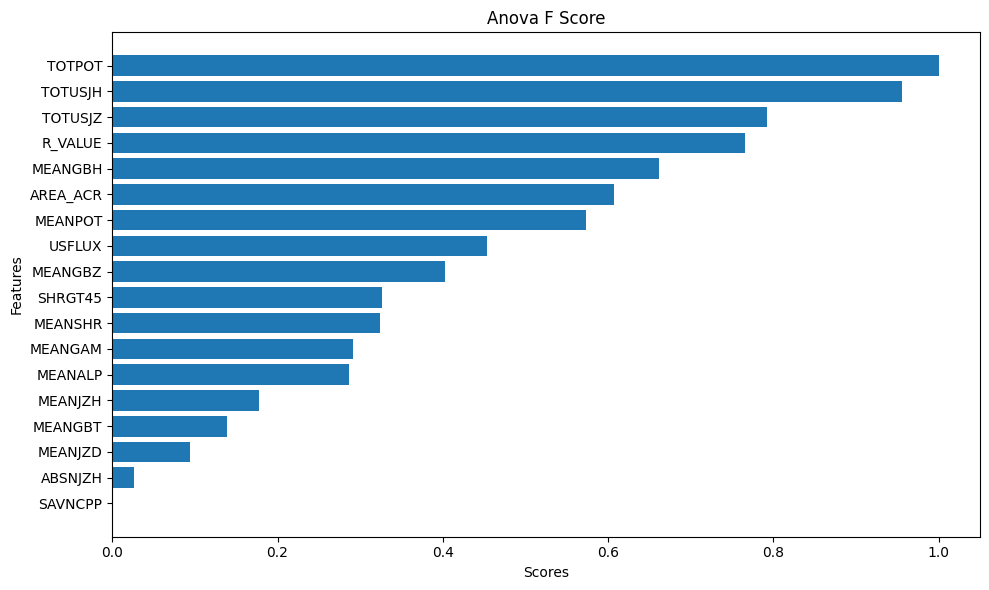

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': normalized_scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

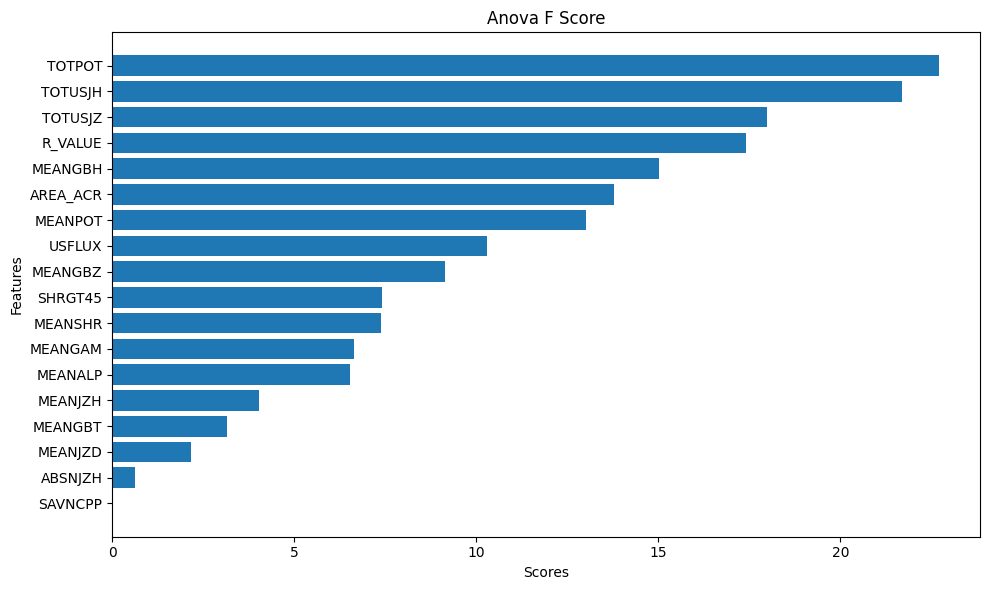

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

In [15]:
df_reordered = df.loc[:, ordered_features]

In [16]:
df_reordered

,TOTPOT,TOTUSJH,TOTUSJZ,R_VALUE,MEANGBH,AREA_ACR,MEANPOT,USFLUX,MEANGBZ,SHRGT45,MEANSHR,MEANGAM,MEANALP,MEANJZH,MEANGBT,MEANJZD,ABSNJZH,SAVNCPP,CME
0,0.133011,0.157575,0.142235,0.837254,0.753790,0.086080,0.567343,0.086611,0.588089,0.871939,0.895704,0.937815,0.678962,0.690394,0.561371,0.563836,0.164015,0.088958,1
1,0.088537,0.084350,0.092601,0.749782,0.451634,0.087608,0.389468,0.086190,0.386897,0.699841,0.708633,0.712539,0.462796,0.507880,0.406908,0.581791,0.013869,0.024879,1
2,0.202599,0.226183,0.218631,0.847709,0.351421,0.179448,0.350893,0.238904,0.396149,0.456517,0.500915,0.470255,0.553205,0.580972,0.377625,0.397570,0.135327,0.257581,1
3,0.034370,0.077162,0.086470,0.691932,0.323702,0.088462,0.111812,0.092185,0.515527,0.206602,0.300243,0.296639,0.628887,0.597047,0.583305,0.493177,0.080831,0.145808,1
4,0.098705,0.134155,0.120722,0.832375,0.692889,0.115699,0.433697,0.076328,0.569345,0.698426,0.720922,0.778385,0.862225,0.776187,0.585365,0.716803,0.237837,0.336367,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,0.250925,0.326891,0.268371,0.893361,0.585838,0.345063,0.473023,0.239298,0.688549,0.538933,0.594205,0.586160,0.322172,0.375618,0.627230,0.545887,0.321483,0.263247,0
1137,0.251061,0.328824,0.267107,0.899460,0.577995,0.342703,0.473240,0.240085,0.686518,0.534624,0.589289,0.578939,0.324323,0.377520,0.622464,0.489594,0.317370,0.278063,0
1138,0.252120,0.329669,0.268913,0.902596,0.577259,0.341915,0.474299,0.239680,0.681493,0.541296,0.596198,0.582880,0.318358,0.372417,0.616919,0.497736,0.329205,0.288476,0
1139,0.250911,0.332506,0.270162,0.895801,0.565665,0.340297,0.465979,0.242272,0.685338,0.528450,0.583499,0.566914,0.322364,0.376915,0.620872,0.482562,0.323152,0.269589,0


In [17]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [18]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

<ipython-input-18-9e7b8b34ef1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
<ipython-input-18-9e7b8b34ef1e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


In [19]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive Events")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative Events")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_features[i])
    plt.title(f"{ordered_features[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2,label=f'Stdev Pos: {std_pos:.2f}')
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2, label=f'Stdev Neg: {std_neg:.2f}')
    plt.xlabel(ordered_features[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_features[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.savefig("2024_parameters_pdf.jpeg")
plt.show()

Output hidden; open in https://colab.research.google.com to view.